布朗运动的公式为：

$$ S_t = S_{0} + \epsilon \sqrt{dt} $$

其中：
- $ S_t $ 是时间 $ t $ 时的位置
- $ S_{t-1} $ 是时间 $ t-1 $ 时的位置
- $ \epsilon_t $ 是从标准正态分布中抽取的随机变量
- $ dt $ 是每个时间步长


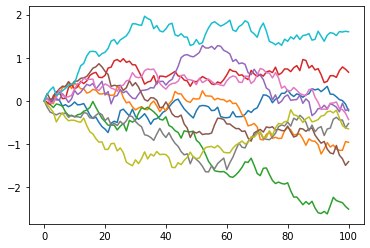

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
#  先不用函数的写法写一遍
S0 = 0  # 起点设置
T = 1   # 假定模拟一年的时间
paths = 10 # 假定模拟10条路径
steps = 100  # 将1年分为100个时间间隔
dt = T / steps # 求出dt
S_path = np.zeros((steps+1,paths))   #创建一个101行（第一行为S0）、10列的矩阵，用来准备储存模拟情况
S_path[0] = S0  #起点设置为S0
rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
for step in range(1,steps+1):
    S_path[step] = S_path[step - 1] + rn[step-1]*np.sqrt(dt)
plt.plot(S_path[:,:])
plt.show()

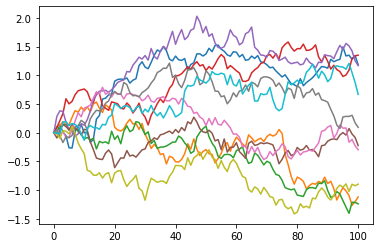

In [2]:
def standar_brownian(steps,paths,T,S0):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] + rn[step-1]*np.sqrt(dt)
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = standar_brownian(steps = 100,paths = 10,T = 1,S0 = 0)


广义布朗运动（Generalized Brownian Motion, GBM）的数学公式为：

$$ S_t = S_{0} + at+b\epsilon \sqrt{dt} $$

其中：
- $ S_t $ 是时间 $ t $ 时的位置
- $ S_0 $ 是初始位置
- $ a $ 是漂移系数（drift coefficient）




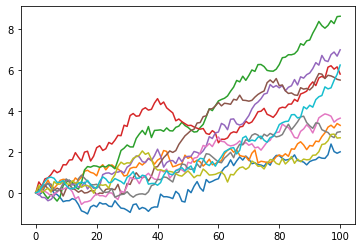

In [3]:
def brownian(steps,paths,T,S0,a,b):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] + a*dt + b* rn[step-1]*np.sqrt(dt) # 和标准布朗运动的区别就在这一行
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = brownian(steps = 100,paths = 10,T = 1,S0 = 0,a = 5, b = 2)


几何布朗运动（Geometric Brownian Motion, GBM）的数学公式为：

$$ dS_t = \mu S_t dt + \sigma S_t dz $$





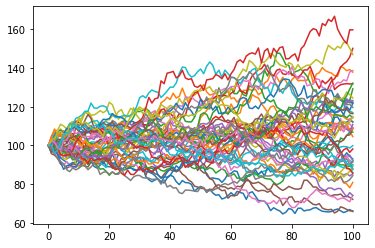

In [4]:
def geo_brownian(steps,paths,T,S0,u,sigma):
    dt = T / steps # 求出dt
    S_path = np.zeros((steps+1,paths))   #创建一个矩阵，用来准备储存模拟情况
    S_path[0] = S0  #起点设置
    rn = np.random.standard_normal(S_path.shape) # 一次性创建出需要的正态分布随机数，当然也可以写在循环里每次创建一个时刻的随机数
    for step in range(1,steps+1):
        S_path[step] = S_path[step - 1] * np.exp((u-0.5*sigma**2)*dt +sigma*np.sqrt(dt)*rn[step]) # 和其他布朗运动的区别就在这一行
    plt.plot(S_path[:,:])
    plt.show()
    return S_path
S_path = geo_brownian(steps = 100,paths = 50,T = 1,S0 = 100,u = 0.03, sigma = 0.2)